### 2.2 Solving the multi-arm bandit

In [ ]:
def exp_reward(action, history):
    rewards_for_action = history[action]
    return sum(rewards_for_action) / len(rewards_for_action)

In [ ]:
def get_best_action(actions):
    best_action = 0
    max_action_value = 0
    
    for i in range(len(actions)):
        cur_action_value = get_action_value(actions[i])
        if cur_action_value > max_action_value:
            best_action = i
            max_action_value = cur_action_value
        
    return best_action

#### 2.2.2 Epsilon-greedy strategy

In [1]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

In [2]:
n = 10
probs = np.random.rand(n)
eps = 0.2

In [3]:
probs

array([0.95857878, 0.55877142, 0.30417299, 0.89839936, 0.86713369,
       0.68798687, 0.2600554 , 0.40608107, 0.82691538, 0.85724486])

In [4]:
def get_reward(prob, n=10):
    reward = 0
    for i in range(n):
        if random.random() < prob:
            reward += 1
    
    return reward

In [5]:
random.random()

0.647440214309859

In [6]:
np.mean([get_reward(0.7) for _ in range(2000)])

6.996

- The first column of `record` will store the number of times each arm has been pulled
- The second column of `record` will store the running average reward

In [7]:
record = np.zeros((n, 2))

$\mu_{n e w}=\frac{k \cdot \mu_{o l d}+x}{k+1}$

In [8]:
def update_record(record, action, r):
    k = record[action, 0]
    mean_old = record[action, 1]
    
    new_r = (k * mean_old + r) / (k + 1)
    
    record[action, 0] += 1
    record[action, 1] = new_r
    
    return record

In [9]:
def get_best_arm(record):
    arm_index = np.argmax(record[:, 1], axis=0)
    return arm_index

##### Solving the $n$-armed bandit

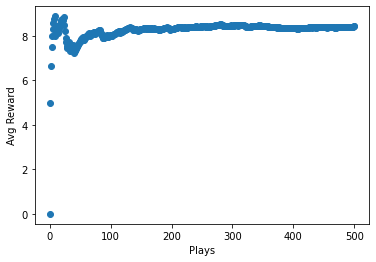

In [10]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
record = np.zeros((n, 2))

# probabilities of reward for each arm
probs = np.random.randn(n)

eps = 0.2

rewards = [0]

for i in range(500):
    if random.random() > eps:
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(10)
    
    r = get_reward(probs[choice])
    record = update_record(record, choice, r)
    mean_reward = ((i+1) * rewards[-1] + r) / (i+2)
    rewards.append(mean_reward)
    
ax.scatter(np.arange(len(rewards)), rewards)

In [11]:
probs

array([ 1.41504339, -1.39738126, -0.04627592,  0.25408151,  0.32893162,
        0.52917802, -0.35852607,  1.28704359, -1.78774021, -0.11061066])

### 2.5 Solving contextual bandits

In [12]:
import numpy as np
import torch
from torch import nn

- `N`: batch_size
- `D_in`: the input dimension
- `H`: the hidden dimension
- `D_out`: the output dimension

In [13]:
arms = 10
N, D_in, H, D_out = 1, arms, 100, arms

In [14]:
model = nn.Sequential(
    nn.Linear(D_in, H),
    nn.ReLU(),
    nn.Linear(H, D_out),
    nn.ReLU()
)

In [15]:
loss_func = nn.MSELoss()

In [24]:
class ContextBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.init_distribution(arms)
        self.update_state()
    
    def init_distribution(self, arms):
        self.bandit_matrix = np.random.rand(arms, arms)
    
    def reward(self, prob):
        reward = 0
        for i in range(self.arms):
            if random.random() < prob:
                reward += 1
        
        return reward
    
    def get_state(self): return self.state
    
    def update_state(self):
        self.state = np.random.randint(0, self.arms)
    
    def get_reward (self, arm):
        return self.reward(self.bandit_matrix[self.get_state()][arm])

    def choose_arm(self, arm):
        reward = self.get_reward(arm)
        self.update_state()
        return reward

In [25]:
env = ContextBandit(arms=10)

In [26]:
state = env.get_state()

In [27]:
state

1

In [28]:
reward = env.choose_arm(1)

In [29]:
reward

8